In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import sklearn.datasets
import time
from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm
from sklearn import datasets
from sklearn.datasets import (make_classification, make_blobs, make_gaussian_quantiles)
# from sklearn.datasets import make_blobs
# from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import accuracy_score
from multiprocessing import Process
from math import pi
from sklearn.model_selection import train_test_split

In [55]:
np.random.seed(66)#Set seed

#Generating random data sets
X, y = make_classification(n_samples=5000, n_features=100, n_informative=2, n_redundant=0, 
                                            n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, 
                                            flip_y=0.01, class_sep=10, hypercube=True, shift=0.0, scale=1.0, 
                                            shuffle=True, random_state=None)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [56]:
#Assigning the training data to variables

data = X_train
target = y_train
rows, columns = data.shape

In [57]:
#defining a function for the projections onto each of the ith sets
def altProj(x, i):
    separation_vector = x + (min(0, target[i] - data[i, :] @ x))*(data[i] / (norm(data[i])**2))
    #separation_vector = x + (min(0, target[i] - beta[i] - data[i, :] @ x))*(data[i] / (norm(data[i])**2))
    return separation_vector

In [58]:
#The Cyclic DR Projection Algoritm

duration = []
for t in range(10):
    start_time = time.time()
    tol = 1e-4                              #tolerance level. 
    residual = 5

    iterate = 0                             #initialization
    iterate_counter = []                    #initialization
    norm_counter = []                       #initialization
    x_start = np.ones(columns)
    norm_counter.append(norm(x_start))
    iterate_counter.append(0)
   
    while residual > tol:
        for row in range(rows):
            Id = x_start
            y_1 = altProj(x_start, row)                #projection onto each rows
            R_y_1 = 2*y_1 - x_start
            y_2 = altProj(R_y_1, (row+1)%rows)         #Wrapping around the rows
        
            R_y_2 = 2*y_2 - R_y_1
            R1_by_R2 = 0.5*(Id + R_y_2)
            x_start = R1_by_R2
        iterate += 1
        iterate_counter.append(iterate)
        norm_counter.append(norm(x_start))
        residual = abs(norm_counter[-1] - norm_counter[-2])

    p = (time.time() - start_time)
    duration.append(round(p, 4))

In [59]:
average_duration = np.mean(duration)
maximum_duration = np.max(duration)
minimum_duration = np.min(duration)

In [60]:
#Converting classified arrays to binary arrays

predict_array = data@x_start
def array_to_binary(array):
    count_one = 0
    count_zero = 0
    binary_array = []

    for elements in array:
        if elements >= 0:
            output = 1
            binary_array.append(output)
            count_one += 1
        else:
            output = 0
            binary_array.append(output)
            count_zero +=1
    
    return binary_array
predicted_class = array_to_binary(predict_array)


In [61]:
#######TRAINING
##Performance measure of the algorithm

def projection_accuracy(target, prediction):
    right = 0
    for object in range(len(target)):
        if target[object] == prediction[object]:
            right += 1
    classification_accuracy = right / float(len(target))
    return classification_accuracy

classification_accuracy = projection_accuracy(target, predicted_class)
#print("The Percentage Accuracy is {}%".format(classification_accuracy))
print("The Percentage Accuracy is {}".format(classification_accuracy))

The Percentage Accuracy is 0.98375


In [62]:
#######TEST
##Performance measure of the algorithm

predict_array_test = X_test@x_start

predicted_class_test = array_to_binary(predict_array_test)

def projection_accuracy(y_test, predicted_class_test):
    right = 0
    for object in range(len(y_test)):
        if y_test[object] == predicted_class_test[object]:
            right += 1
    classification_accuracy = right / float(len(y_test))
    return classification_accuracy
classification_accuracy_test = projection_accuracy(y_test, predicted_class_test)
#print("The Percentage Test Accuracy is: {:.4f}%".format(classification_accuracy))
print("The Percentage Test Accuracy is: {:.4f}".format(classification_accuracy_test))

The Percentage Test Accuracy is: 0.9800


In [63]:
print('Convergence after {} iterations'.format(iterate))
print('Duration to Convergence:')
print("[{0}]".format(', '.join(map(str, duration))))
print('The Average Duration to Convergence {} seconds'.format(average_duration))
print('The Minimum Duration to Convergence {} seconds'.format(minimum_duration))
print('The Maximum Duration to Convergence {} seconds'.format(maximum_duration))
print("The Training Accuracy is {}".format(classification_accuracy))
print("The Test Accuracy is: {:.4f}".format(classification_accuracy_test))

Convergence after 25 iterations
Duration to Convergence:
[3.7935, 3.7474, 3.7338, 3.7746, 3.6492, 3.7479, 3.7778, 3.69, 3.7343, 3.716]
The Average Duration to Convergence 3.73645 seconds
The Minimum Duration to Convergence 3.6492 seconds
The Maximum Duration to Convergence 3.7935 seconds
The Training Accuracy is 0.98375
The Test Accuracy is: 0.9800


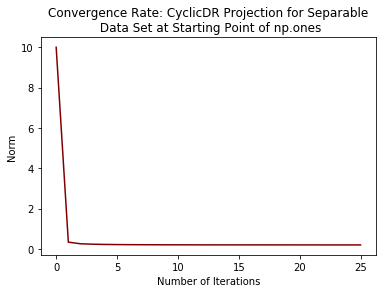

In [65]:
##Convergence Plot

f = plt.figure()
plt.title("Convergence Rate: CyclicDR Projection for Separable\n Data Set at Starting Point of np.ones")
plt.plot(iterate_counter, norm_counter, c = "maroon")
plt.xlabel("Number of Iterations")
plt.ylabel("Norm")
plt.show()

f.savefig("Fig8.png", bbox_inches='tight')